In [1]:
import pandas as pd
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


##  A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.

In [3]:
fileURL = "iris.data"
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'] , header=None)
iris = iris.dropna()

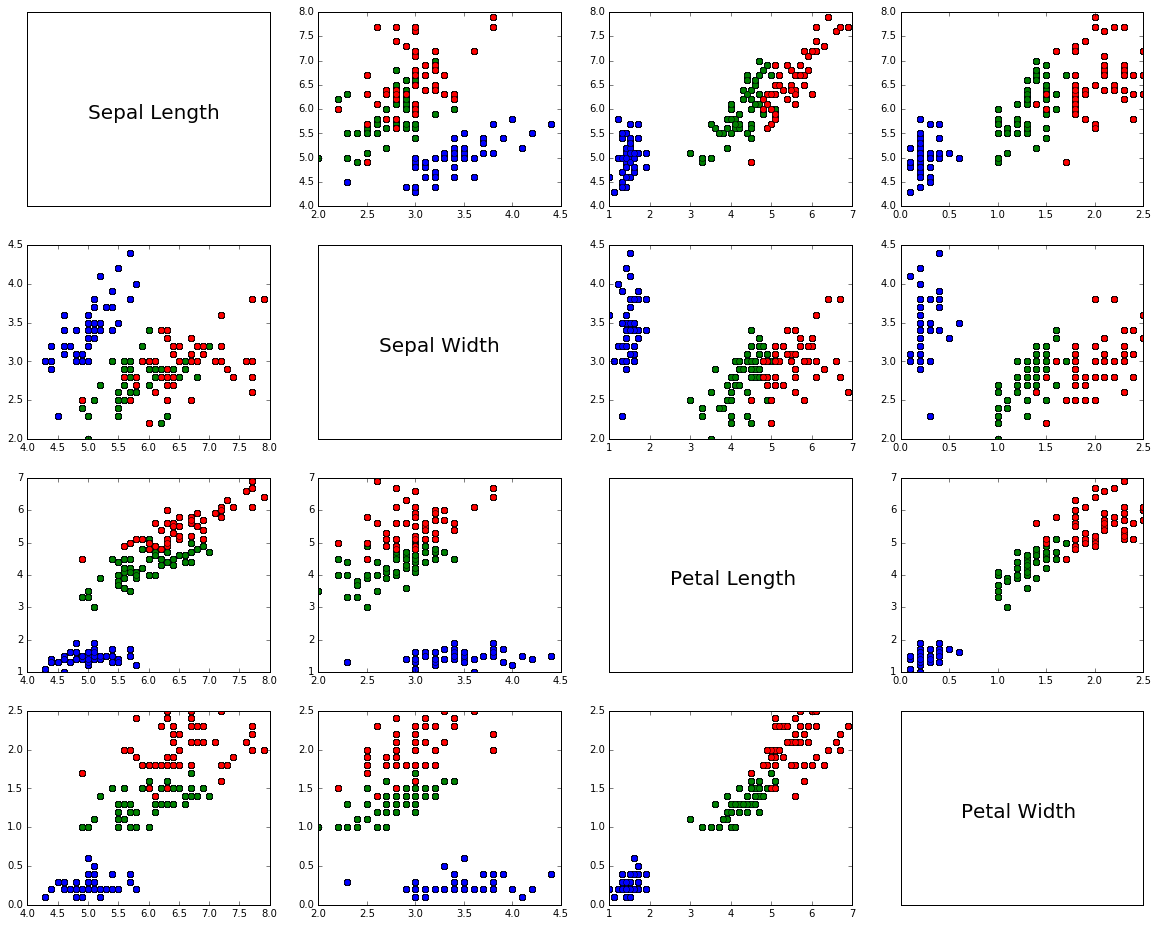

In [4]:
pairs(iris)

## A plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics.

In [5]:
iris = datasets.load_iris()
iris_sepal_length = iris.data[:, np.newaxis, 0]
iris_sepal_width = iris.data[:, np.newaxis, 1]
iris_petal_length = iris.data[:, np.newaxis, 2]
iris_petal_width = iris.data[:, np.newaxis, 3]
regr = linear_model.LinearRegression()

### X: Sepal Length, Y: Sepal Width

In [6]:
sepal_length_training, sepal_length_testing, sepal_width_training, sepal_width_testing = train_test_split(iris_sepal_length, iris_sepal_width, test_size=0.33, random_state=42)

In [7]:
regr.fit(sepal_length_training, sepal_width_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(sepal_length_testing) - sepal_width_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sepal_length_testing, sepal_width_testing))

Coefficients: 
 [[-0.02444726]]
Mean squared error: 0.22
Variance score: -0.08


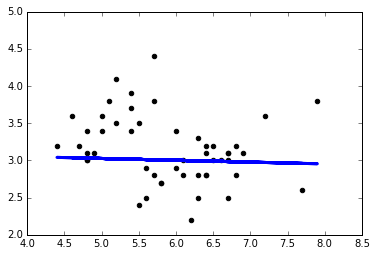

In [8]:
plt.scatter(sepal_length_testing, sepal_width_testing,  color='black')
plt.plot(sepal_length_testing, regr.predict(sepal_length_testing), color='blue',linewidth=3)

### X: Sepal Length, Y: Petal Length

In [9]:
sepal_length_training, sepal_length_testing, petal_length_training, petal_length_testing = train_test_split(iris_sepal_length, iris_petal_length, test_size=0.33, random_state=42)

In [10]:
regr.fit(sepal_length_training, petal_length_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(sepal_length_testing) - petal_length_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sepal_length_testing, petal_length_testing))

Coefficients: 
 [[ 1.79648272]]
Mean squared error: 0.77
Variance score: 0.77


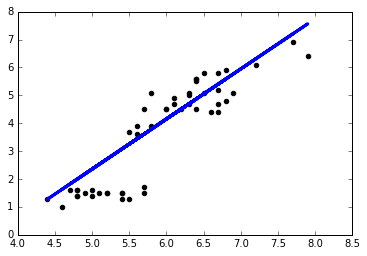

In [11]:
plt.scatter(sepal_length_testing, petal_length_testing, color='black')
plt.plot(sepal_length_testing, regr.predict(sepal_length_testing), color='blue',linewidth=3)

### X: Sepal Length, Y: Petal Width

In [12]:
sepal_length_training, sepal_length_testing, petal_width_training, petal_width_testing = train_test_split(iris_sepal_length, iris_petal_width, test_size=0.33, random_state=42)

In [13]:
regr.fit(sepal_length_training, petal_width_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(sepal_length_testing) - petal_width_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sepal_length_testing, petal_width_testing))

Coefficients: 
 [[ 0.7104469]]
Mean squared error: 0.17
Variance score: 0.73


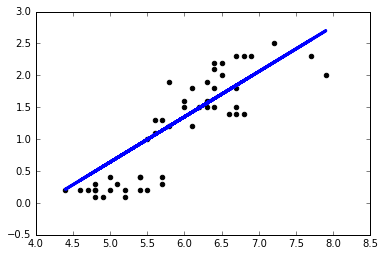

In [14]:
plt.scatter(sepal_length_testing, petal_width_testing,color='black')
plt.plot(sepal_length_testing, regr.predict(sepal_length_testing), color='blue',linewidth=3)

### X: Sepal Width, Y: Sepal Length

In [15]:
sepal_width_training, sepal_width_testing, sepal_length_training, sepal_length_testing = train_test_split(iris_sepal_width, iris_sepal_length, test_size=0.33, random_state=42)

In [16]:
regr.fit(sepal_width_training, sepal_length_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(sepal_width_testing) - sepal_length_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sepal_width_testing, sepal_length_testing))

Coefficients: 
 [[-0.09856213]]
Mean squared error: 0.65
Variance score: 0.01


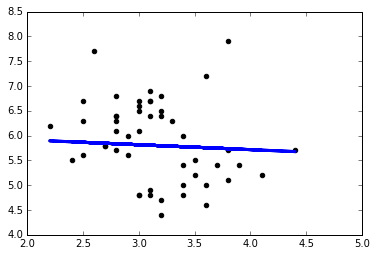

In [17]:
plt.scatter(sepal_width_testing, sepal_length_testing,  color='black')
plt.plot(sepal_width_testing, regr.predict(sepal_width_testing), color='blue',linewidth=3)

### X: Sepal Width, Y: Petal Length

In [18]:
sepal_width_training, sepal_width, petal_length_training, petal_length_testing = train_test_split(iris_sepal_width, iris_petal_length, test_size=0.33, random_state=42)

In [19]:
regr.fit(sepal_width_training, petal_length_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(sepal_width_testing) - petal_length_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sepal_width_testing, petal_length_testing))

Coefficients: 
 [[-1.48690507]]
Mean squared error: 2.46
Variance score: 0.25


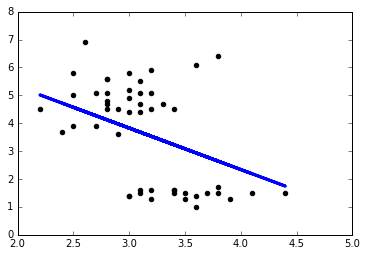

In [20]:
plt.scatter(sepal_width_testing, petal_length_testing,  color='black')
plt.plot(sepal_width_testing, regr.predict(sepal_width_testing), color='blue',linewidth=3)

### X: Sepal Width, Y: Petal Width

In [21]:
sepal_width_training, sepal_width_testing, petal_width_training, petal_width_testing = train_test_split(iris_sepal_width, iris_petal_width, test_size=0.33, random_state=42)

In [22]:
regr.fit(sepal_width_training, petal_width_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(sepal_width_testing) - petal_width_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sepal_width_testing, petal_width_testing))

Coefficients: 
 [[-0.52582806]]
Mean squared error: 0.51
Variance score: 0.19


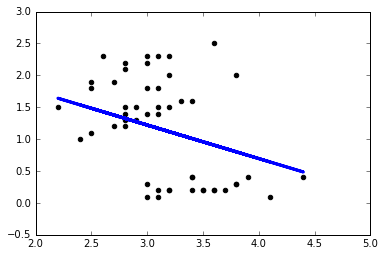

In [23]:
plt.scatter(sepal_width_testing, petal_width_testing,  color='black')
plt.plot(sepal_width_testing, regr.predict(sepal_width_testing), color='blue',linewidth=3)

### X: Petal Length, Y: Sepal Length

In [24]:
petal_length_training, petal_length_testing, sepal_length_training, sepal_length_testing = train_test_split(iris_petal_length, iris_sepal_length, test_size=0.33, random_state=42)

In [25]:
regr.fit(petal_length_training, sepal_length_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict( petal_length_testing) - sepal_length_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score( petal_length_testing, sepal_length_testing))

Coefficients: 
 [[ 0.41657395]]
Mean squared error: 0.15
Variance score: 0.77


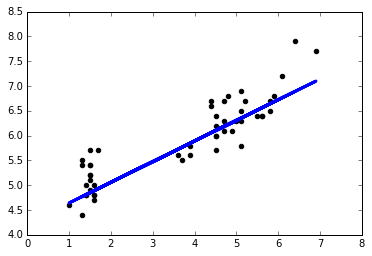

In [26]:
plt.scatter(petal_length_testing, sepal_length_testing,  color='black')
plt.plot(petal_length_testing, regr.predict(petal_length_testing), color='blue',linewidth=3)

### X: Petal Length, Y: Sepal Width

In [27]:
petal_length_training, petal_length_testing, sepal_width_training, sepal_width_testing = train_test_split(iris_petal_length, iris_sepal_width, test_size=0.33, random_state=42)

In [28]:
regr.fit(petal_length_training, sepal_width_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(petal_length_testing) - sepal_width_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(petal_length_testing, sepal_width_testing))

Coefficients: 
 [[-0.08552093]]
Mean squared error: 0.17
Variance score: 0.16


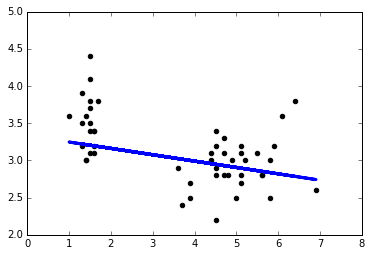

In [29]:
plt.scatter(petal_length_testing, sepal_width_testing,  color='black')
plt.plot(petal_length_testing, regr.predict(petal_length_testing), color='blue',linewidth=3)

### X: Petal Length, Y: Petal Width

In [30]:
petal_length_training, petal_length_testing, petal_width_training, petal_width_testing = train_test_split(iris_petal_length, iris_petal_width, test_size=0.33, random_state=42)

In [31]:
regr.fit(petal_length_training, petal_width_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict( petal_length_testing) - petal_width_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score( petal_length_testing, petal_width_testing))

Coefficients: 
 [[ 0.41350253]]
Mean squared error: 0.04
Variance score: 0.94


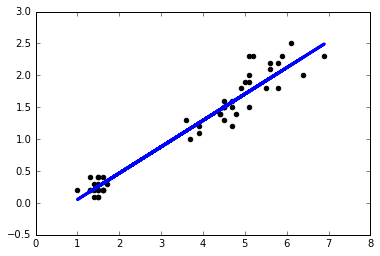

In [32]:
plt.scatter(petal_length_testing, petal_width_testing,  color='black')
plt.plot(petal_length_testing, regr.predict(petal_length_testing), color='blue',linewidth=3)

### X: Petal Width, Y: Sepal Length

In [33]:
petal_width_training, petal_width_testing, sepal_length_training, sepal_length_testing = train_test_split(iris_petal_width, iris_sepal_length, test_size=0.33, random_state=42)

In [34]:
regr.fit(petal_width_training, sepal_length_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict( petal_width_testing) - sepal_length_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score( petal_width_testing, sepal_length_testing))

Coefficients: 
 [[ 0.88457601]]
Mean squared error: 0.17
Variance score: 0.74


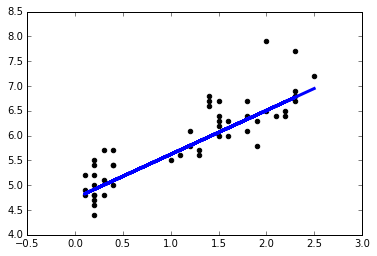

In [35]:
plt.scatter(petal_width_testing, sepal_length_testing,  color='black')
plt.plot(petal_width_testing, regr.predict(petal_width_testing), color='blue',linewidth=3)

### X: Petal Width, Y: Sepal Width

In [36]:
petal_width_training, petal_width_testing, sepal_width_training, sepal_width_testing = train_test_split(iris_petal_width, iris_sepal_width, test_size=0.33, random_state=42)

In [37]:
regr.fit(petal_width_training, sepal_width_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(petal_width_testing) - sepal_width_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(petal_width_testing, sepal_width_testing))

Coefficients: 
 [[-0.16239304]]
Mean squared error: 0.18
Variance score: 0.09


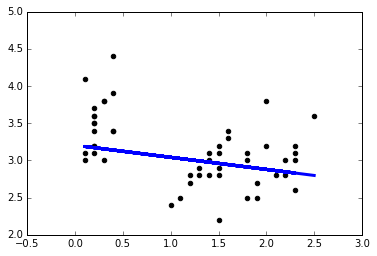

In [38]:
plt.scatter(petal_width_testing, sepal_width_testing,  color='black')
plt.plot(petal_width_testing, regr.predict(petal_width_testing), color='blue',linewidth=3)

### X: Petal Width, Y: Petal Length

In [39]:
petal_width_training, petal_width_testing, petal_length_training, petal_length_testing = train_test_split(iris_petal_width, iris_petal_length, test_size=0.33, random_state=42)

In [40]:
regr.fit(petal_width_training, petal_length_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(petal_width_testing) - petal_length_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(petal_width_testing, petal_length_testing))

Coefficients: 
 [[ 2.22030508]]
Mean squared error: 0.19
Variance score: 0.94


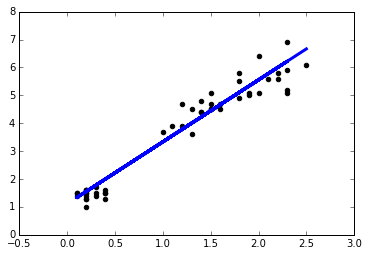

In [41]:
plt.scatter(petal_width_testing, petal_length_testing,  color='black')
plt.plot(petal_width_testing, regr.predict(petal_width_testing), color='blue',linewidth=3)

## The Best Overall Regression Model

In [42]:
sepal = iris.data[:, [0, 1]]
sepal_training, sepal_testing, petal_length_training, petal_length_testing = train_test_split(sepal, iris_petal_length, test_size=0.33, random_state=42)

In [43]:
regr.fit(sepal_training, petal_length_training)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(sepal_testing) - petal_length_testing) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(sepal_testing, petal_length_testing))

Coefficients: 
 [[ 1.76438338 -1.31300369]]
Mean squared error: 0.33
Variance score: 0.90


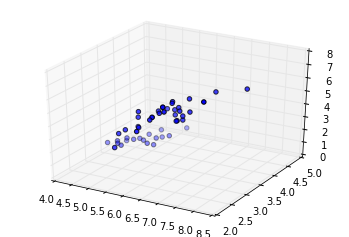

In [44]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(sepal_length_testing, sepal_width_testing, petal_length_testing)

## Questions

*  Based upon the linear models you generated, which pair of features appear to be most
   predictive for one another? Note that you can answer this question based upon the output
   provided for the linear models.

**Answer**: Based upon the linear models, Petal Length vs Petal Width and Petal Width vs Petal Length appear to be most predictive for one another. This can be observed by looking at how well fit the blue line that best minimize the the residual sum of squares between the observed responses. Also, Variance Scores are both 0.94, extremely close to 1 the perfect prediction.


* Suppose you tried to generate a classification model on this dataset, but only after removing
  the feature that you were best able to predict based upon other features. How would
  removing this feature affect the classification performance?
  
**Answer**: If an feature is easy to predict based upon other features, it means this feature is important for creating a classification model. Because the performance of this classification model can be affected by this feature since other features lower the probability of successfully classifying future inputs.